<center><img src="https://i2.wp.com/hackwagon.com/wp-content/uploads/2017/02/Logo-Web-Export.png?ssl=1" width=200/></center>
<h1> Hackwagon Academy DS102 Lesson 2A </h1>
<h2> Pandas (Part 2)</h2> 
<h3> Lesson Outline </h3>

- 1. [Recap](#1)
    - 1.1 [Series](#1.1)
    - 1.2 [DataFrame](#1.2)
    - 1.3 [Filtering](#1.3)
    - 1.4 [Descriptive Statistics](#1.4)
    - [Practice I](#P1)
- 2. [Data Cleaning - Transformation](#2)
    - 2.1 [Functions Recap](#2.1)
    - 2.2 [.apply()](#2.2)
    - 2.3 [.replace()](#2.3)
    - 2.4 [.map()](#2.3)
    - [Practice II](#P2)
- 3. [Univariate Analysis](#3)
    - 3.1 [Interquartile Range (IQR)](#3.1)
    - 3.2 [Outlier Detection](#3.2)
    - [Practice III](#P3)
- 4. [Data Aggregation](#4)
    - 4.1 [GroupBy](#4.1)
    - 4.2 [Simple Aggregation](#4.2)
    - 4.3 [Advanced Aggregation](#4.3)
    - 4.4 [Pokemon Dataset](#4.4)
    - [Practice IV](#P4)

### Import Libraries

In [2]:
import pandas as pd
import numpy as np

<hr/>

<a id='1'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;1.</font><font color="salmon"> Recap </font> </h2></a>

<a id='1.1'><h3>1.1 DataFrame</h3></a>

A two-dimensional, tabular data structure with labeled axes (rows and columns), and is the **primary** pandas data structure. You can think of a `DataFrame` as a spreadsheet in Python.
A `DataFrame` is made up of multiple `Series` objects stuck together vertically and horizontally. <br>

In [12]:
feedback_df = pd.read_csv('HWAPandasSandbox.csv')
feedback_df.head()

,ClassID,ClassType,Co-Instructor,Coordinating_TA,Instructor,Rating,Students
0,1,DS101,False,Dick,Jon,Nil,40
1,2,DS101,True,Vera,Andre,7,43
2,3,DS102,False,Vera,Jon,9,41
3,4,DS102,True,Dick,Andre,Nope,44
4,5,DS101,True,Dick,Andre,10,45


<a id='1.1'><h3>1.2 Series</h3></a>

A `Series` == Row / Column of a `Dataframe`

- Extracting a column from a `Dataframe` is very similar to accessing data in a `dictionary`. 

In [5]:
feedback_df['Instructor']

0      Jon
1    Andre
2      Jon
3    Andre
4    Andre
Name: Instructor, dtype: object

### Create New Column with Series 

We can create new columns to add to a DataFrame.

```python
    df['new_col_name'] = Series
```

In [6]:
feedback_df['StudentsSquared'] = feedback_df['Students'] ** 2
feedback_df.head()

,ClassID,ClassType,Co-Instructor,Coordinating_TA,Instructor,Rating,Students,StudentsSquared
0,1,DS101,False,Dick,Jon,Nil,40,1600
1,2,DS101,True,Vera,Andre,7,43,1849
2,3,DS102,False,Vera,Jon,9,41,1681
3,4,DS102,True,Dick,Andre,Nope,44,1936
4,5,DS101,True,Dick,Andre,10,45,2025


<a id='1.3'><h3>1.3 Filtering</h3></a>

We can filter for results within a `DataFrame` to get the data we want. 

We specify the column we want to isolate in the DataFrame, then specify the boolean condition we are looking for. For example, we want to find the `Females` in the `Sex` column. 

```python
df['sex'] == 'Females'

# or for multiple conditions, we link them by & (and) or | (or) symbols
# where each condition is surrounded by a ()

(df['sex'] == 'Females') & (df['type_of_course'] == 'Medicine')

```

This gives us a Boolean Series of multiple `True` and `False` values. 

In [7]:
ds101_only = feedback_df['ClassType'] == 'DS101'
print(ds101_only)
andre_only = feedback_df['Instructor'] == 'Andre'
ds101_andre = feedback_df[ds101_only & andre_only]
ds101_andre

0     True
1     True
2    False
3    False
4     True
Name: ClassType, dtype: bool


,ClassID,ClassType,Co-Instructor,Coordinating_TA,Instructor,Rating,Students,StudentsSquared
1,2,DS101,True,Vera,Andre,7,43,1849
4,5,DS101,True,Dick,Andre,10,45,2025


<a id='1.4'><h3>1.4 Descriptive Statistics</h3></a>

`Dataframes` and `Series` objects have many useful methods to help you compute statistics.

<table>
  <tr>
    <th>Statistical measure</th>
    <th>Dataframe method</th>
    <th>Series method</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>Mean</td>
    <td>df.mean()</td>
    <td>df['column_name'].mean()</td>
    <td>Returns the mean of all columns / the selected column</td>
  </tr>
  <tr>
    <td>Median</td>
    <td>df.median()</td>
    <td>df['column_name'].median()</td>
    <td>Returns the median of all columns / the selected column</td>
  </tr>
  <tr>
    <td>Standard Deviation</td>
    <td>df.std()</td>
    <td>df['column_name'].std()</td>
    <td>Returns the standard deviation of all columns / the selected column</td>
  </tr>
  <tr>
    <td>Sum</td>
    <td>df.sum()</td>
    <td>df['column_name'].sum()</td>
    <td>Returns the sum of all columns / the selected column</td>
  </tr>
  <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
</table>

In [8]:
feedback_df['Students'].mean()

42.6

<a id='P1'><h2> <img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Practice I </font><font color="skyblue"> * </font></h2></a>

### Wines Dataset

Read the `wines-3k.csv` dataset as `wines_df` (don't forget the `sep='|'` parameter) and preview the dataset with `.head()`.

In [9]:
wines_df = pd.read_csv('wines-3k.csv', sep='|')

wines_df.head()

,country,points,price
0,US,84,12.0
1,Italy,87,15.0
2,US,86,48.0
3,US,89,150.0
4,Italy,89,59.0


### Restructure DataFrame to `country` and `price`

**Expected Output:**

<img src="https://i.imgur.com/ilPXbb4.png">

In [10]:
wines_df = wines_df[['country','price']] 
wines_df

,country,price
0,US,12.0
1,Italy,15.0
2,US,48.0
3,US,150.0
4,Italy,59.0
...,...,...
2995,US,38.0
2996,Italy,16.0
2997,France,15.0
2998,Italy,55.0


### Filter for `Australia` wines and get their average `price`

**Expected Output:**
    
    33.80232558139535

In [11]:
australia_condition = wines_df['country'] == 'Australia'
australia_df = wines_df[australia_condition]
australia_df['price'].mean()

33.80232558139535

### Fill Missing Values With 0 and Sort `price` in Ascending Order

**Expected Output:**
    
<img src="https://i.imgur.com/f4pLmni.png">

In [12]:
# wines_df.isnull().count()
filled_df = wines_df.fillna(0)
filled_df.sort_values('price')

,country,price
1111,Austria,0.0
1638,Italy,0.0
1623,New Zealand,0.0
1621,France,0.0
1620,Italy,0.0
...,...,...
1876,France,288.0
1505,US,300.0
2053,France,360.0
1902,France,450.0


<a id='2'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;2.</font><font color="salmon"> Data Cleaning - Transformation </font> </h2></a>

Pandas allow for quick data preprocessing and cleaning with useful methods such as:

1. `.apply()`
2. `.replace()`
3. `.map()`

<a id='2.1'><h3>2.1 Functions Recap</h3></a>

<img src='https://i.imgur.com/jhpovl8.png' width="350">

In [13]:
# classic syntax
def give_first_item(a_list):
    return a_list[0]

In [14]:
print(give_first_item([10,20,30,40]))
print(give_first_item([100,200,300]))

10
100


### The Lambda 

The `lambda` reserved keyword is a short form way of making a function.

<img src="https://i.imgur.com/u7F81LJ.png" width='200'>

In [37]:
# lambda systax
lambda x: x[0]


<function __main__.<lambda>(x)>

### Hackwagon Pandas Sandbox 

Open the pandas sandbox dataset

In [3]:
feedback_df = pd.read_csv('HWAPandasSandbox.csv')
feedback_df.head()

,ClassID,ClassType,Co-Instructor,Coordinating_TA,Instructor,Rating,Students
0,1,DS101,False,Dick,Jon,Nil,40
1,2,DS101,True,Vera,Andre,7,43
2,3,DS102,False,Vera,Jon,9,41
3,4,DS102,True,Dick,Andre,Nope,44
4,5,DS101,True,Dick,Andre,10,45


<a id='2.2'><h3>2.2  <code>.apply()</code></h3></a>

The `.apply()` function is very useful for data cleaning a variable in a dataset. 

<img src="https://i.imgur.com/99M6Vl7.png" width="400">
<img src="https://i.imgur.com/4e6B9RM.png" width="500">

Even after applying the method, <b>it does not change the column of df permanently.</b> The method returns a new Series object, where you can store it as another variable.

In [17]:
print(feedback_df['Students'])

def add_one(x):
    return x+1

feedback_df['Students_addone'] = feedback_df['Students'].apply(lambda x: x+1)
feedback_df

def transform_class_type(class_type):
    if class_type == 'DS101':
        return 0
    elif class_type == 'DS102':
        return 1
    else:
        return - 1
feedback_df['ClassType_int'] = feedback_df['ClassType'].apply(transform_class_type)
feedback_df

0    40
1    43
2    41
3    44
4    45
Name: Students, dtype: int64


,ClassID,ClassType,Co-Instructor,Coordinating_TA,Instructor,Rating,Students,Students_addone,ClassType_int
0,1,DS101,False,Dick,Jon,Nil,40,41,0
1,2,DS101,True,Vera,Andre,7,43,44,0
2,3,DS102,False,Vera,Jon,9,41,42,1
3,4,DS102,True,Dick,Andre,Nope,44,45,1
4,5,DS101,True,Dick,Andre,10,45,46,0


<a id='2.3'><h3>2.3  <code>.replace()</code></h3></a>

The `.replace()` method works similarly to `.apply()` but just that its parameter takes in a <b>single value or a list</b> and it requires a second argument, a value to be replaced with.

### Investigate Unique

To effectively use replace properly, we need to first investigate if the number of unique values within a variable. We can do that by using `.unique()`. 

In [18]:
feedback_df['Rating'].unique()

array(['Nil', '7', '9', 'Nope', '10'], dtype=object)

### Use `.replace()`
<img src="https://i.imgur.com/lW14HGv.png" width="400">
<img src="https://i.imgur.com/0Xl0YQ9.png" width="500">

Similar to the `.apply()` method, even after applying the method, <b>it does not change the column of df permanently.</b> The method returns a new Series object. Therefore it needs to be stored back to the same column or a new column in the DataFrame.

In [20]:
feedback_df['Rating_clean'] = feedback_df['Rating'].replace(['Nil','Nope'], 0)
feedback_df


,ClassID,ClassType,Co-Instructor,Coordinating_TA,Instructor,Rating,Students,Students_addone,ClassType_int,Rating_clean
0,1,DS101,False,Dick,Jon,Nil,40,41,0,0
1,2,DS101,True,Vera,Andre,7,43,44,0,7
2,3,DS102,False,Vera,Jon,9,41,42,1,9
3,4,DS102,True,Dick,Andre,Nope,44,45,1,0
4,5,DS101,True,Dick,Andre,10,45,46,0,10


<a id='2.4'><h3>2.4  <code>.map()</code></h3></a>

Sometimes there are too many unique values to change/replace, this is where the `.map()` method becomes effective. To use it effectively, we need to get a dictionary mapping of the 

### Investigate Unique

To effectively use replace properly, we need to first investigate if the number of unique values within a variable. We can do that by using `.unique()`.

In [15]:
feedback_df['ClassType'].unique()

array(['DS101', 'DS102'], dtype=object)

### Use `.map()`
<img src="https://i.imgur.com/01y9Z11.png" width="400">
<img src="https://i.imgur.com/WXVfjDE.png" width="500">

Similar to the `.apply()` method, even after applying the method, <b>it does not change the column of df permanently.</b> The method returns a new Series object. Therefore it needs to be stored back to the same column or a new column in the DataFrame.

In [14]:
feedback_df['ClassType_Int'] = feedback_df['ClassType'].map({'DS101':0, 'DS102': 1})
feedback_df

,ClassID,ClassType,Co-Instructor,Coordinating_TA,Instructor,Rating,Students,ClassType_Int
0,1,DS101,False,Dick,Jon,Nil,40,0
1,2,DS101,True,Vera,Andre,7,43,0
2,3,DS102,False,Vera,Jon,9,41,1
3,4,DS102,True,Dick,Andre,Nope,44,1
4,5,DS101,True,Dick,Andre,10,45,0


<a id='P2'><h2> <img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Practice II </font><font color="skyblue"> * </font></h2></a>

### Pokemon Dataset

Read the `pokemon.csv` as a DataFrame called `pokemon_df`.

In [19]:
pokemon_df = pd.read_csv('pokemon.csv')
pokemon_df.head()

,Pokemon_ID,Name,Type,HP,Attack,Defense,Speed,Legendary
0,1,Bulbasaur,Grass,45,49,49,45,False
1,2,Ivysaur,Grass,60,62,63,60,False
2,3,Venusaur,Grass,80,82,83,80,False
3,3,VenusaurMega Venusaur,Grass,80,100,123,80,False
4,4,Charmander,Fire,39,52,43,65,False


### Calculate Min Max

Create 2 variables that has the maxmimum and minimum value of the `Speed` column, naming them `max_speed` and `min_speed`.

**Expected Output:**
``` python   
    180 # max speed
    5 # min speed
```

In [39]:
# min_speed = pokemon_df.describe()['Speed']
min_speed = pokemon_df['Speed'].min()
max_speed = pokemon_df['Speed'].max()
# max_speed = pokemon_df.describe()['Speed'].max()
print(min_speed, max_speed)

5 180


### Create Normalise Function

Using the two variables created above, prepare a function called `calculate_normalised_speed()` that has a parameter `speed`. Inside the function, it should return the result of the following formula:

$$
\text{Normalised Speed}_x = \frac{Speed_x - Speed_{min}}{Speed_{max} - Speed_{min}}
$$

_You can use `lambda` or `def`_

In [41]:
def calculate_normalised_speed(speed):
    norm_speed = (speed - min_speed) / (max_speed - min_speed)
    return norm_speed

calculate_normalised_speed = lambda speed: (speed - min_speed) / (max_speed - min_speed)

### Using `.apply()`, Create New Column

Using the `.apply()` method on the `Speed` column, create a new column called `Normalised_Speed` to the `df`. <b>Make sure you store it back to the `pokemon_df`</b>

In [ ]:
pokemon_df['Normalised_Speed'] = pokemon_df['Speed'].apply(calculate_normalised_speed)

### Use `.head()` to preview newly altered df

<b>Expected Output:</b>
    
<img src="https://i.imgur.com/BFIq4Hz.png">

In [36]:
pokemon_df.head()

,Pokemon_ID,Name,Type,HP,Attack,Defense,Speed,Legendary
0,1,Bulbasaur,Grass,45,49,49,45,False
1,2,Ivysaur,Grass,60,62,63,60,False
2,3,Venusaur,Grass,80,82,83,80,False
3,3,VenusaurMega Venusaur,Grass,80,100,123,80,False
4,4,Charmander,Fire,39,52,43,65,False


### Use `.to_csv()` to save your preprocessed data

Save the new df as a new csv file with the `.to_csv()` with `normalised_pokemon.csv` as the name in the ().

In [43]:
# remove index column
pokemon_df.to_csv('normalised_pokemon.csv', index = False)

<a id='3'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;3.</font><font color="salmon"> Univariate Analysis</font> </h2></a>

In Univariate Analysis, we want to understand a single variable dataset. The common measures include:

1. Mean (Average)
2. Median 
3. Mode 
4. Max & Min 
5. Spread 

One of the most useful measure is understanding the spread of a variable. To measure spread we need to understand the following: 
- Variance & Standard Deviation (learnt last lesson)
- Interquartile Range 

Once we understand the spread of our dataset, we can also detect <b>outliers</b> within the dataset. We're now going to understand how to understand the spread and distribution of the dataset, then detect the outliers of our dataset.

<a id='3.1'><h3>3.1 Interquartile Range (IQR)</h3></a>

A good statistic for summarizing a non-Gaussian (normal) distribution sample of data is the Interquartile Range, IQR. The values are arranged from the lowest to the highest, 
- the **first quartile** is the value where 25% of values are below the value. It is also called the 25th percentile
- the **second quartile** is the value where 50% of values are below the value. It is also called the 50th percentile or the median
- the **third quartile** is the value where 75% of values are below the value. It is also called the 75th percentile

<img src="https://i.imgur.com/27S1Rkh.png" width="400">
<img src="https://i.imgur.com/urMTl4I.png" width="400">
<img src="https://i.imgur.com/9SIeV9P.png" width="400">

<a id='3.2'><h3>3.2 Outlier Detection</h3></a>

An outlier is an observation that is unlike the other observations. It is rare, or distinct, or does not fit in some way. Outliers can have many causes, such as:

- Measurement or input error
- Data corruption
- True outlier observation (e.g. Michael Jordan in basketball)

<img src="https://i.imgur.com/qB3Mynv.png" width="500">

<a id='P1'><h2> <img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Practice III </font><font color="skyblue"> * </font></h2></a>

### Seattle Wages

Prepare the Seattle Wages dataset and let's investigate the possible outliers of this dataset based on `Hourly Rate`. 

Open the `seattle-wages-2k.csv` and open it with pandas and store into a variable called `wages_df`. Preview the dataset with `.head()`.

In [44]:
wages_df = pd.read_csv('seattle-wages-2k.csv')
wages_df.head()

,Department,Job_Title,Hourly_Rate
0,Seattle Public Utilities,"Civil Engrng Spec,Assoc",38.67
1,Seattle Dept of Transportation,Bridge Elecl Maint Supv,46.15
2,City Light,Plng&Dev Spec II,40.93
3,Seattle Center,Stage Tech *,30.42
4,Mayor's Office,Executive2,67.50


### Calculate the Quartiles

Using `.quantile()` get Q1 and Q3 and store them in variables `quartile_1` and `quartile_3`. Inside this function set the `q=` parameter to the % of the quartile.

**Expected Output:**
```python
    29.09 # quartile_1
    47.9775 # quartile_3
```

In [89]:
quartile_1 = wages_df['Hourly_Rate'].quantile(q = 0.25)
quartile_3 = wages_df['Hourly_Rate'].quantile(q = 0.75)
print(quantile_1)
print(quantile_3)

29.09
47.9775


### Calculate the IQR 

Using the above variables, calculate the IQR and store it in the variable `IQR`.

**Expected Output:**

    18.8875

In [90]:
IQR = quantile_3-quantile_1

### Calculate Bounds

Using the variables above, calculate the upper and lower bounds and store them into the variables `lower_bound` and `upper_bound`.

**Expected Output:**
```python
    0.7587500000000027 # lower bound
    76.30875 # upper bound
```

In [91]:
lower_bound = quartile_1 - 1.5 * IQR
upper_bound = quartile_3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)


0.7587500000000027
76.30875


### Filter Data for Rows Within Bound

Using what you have learnt about filtering, retrieve the data which are deemed as outliers. You should use the variables you've created above. Store this data as variable `outliers_df`.

**Expected Output:**
```python
    print(len(outliers_df)) # 24
```

In [96]:
condition1 = wages_df['Hourly_Rate'] < lower_bound
condition2 = wages_df['Hourly_Rate'] > upper_bound
outliers_df =  wages_df[condition1 | condition2]

print(len(outliers_df))

# outliers_df = wages_df[~wages_df['Hourly_Rate'].between(lower_bound, upper_bound)]

24


### Visualise (End of Practice)

When you've completed the above practice, you can cross check your answers with the visualisation below. 

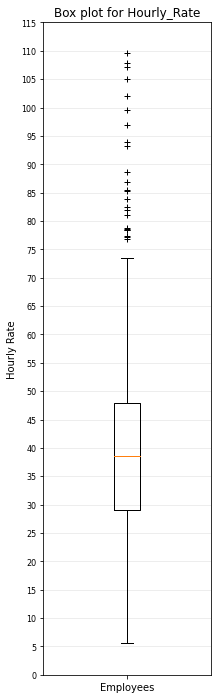

In [97]:
import matplotlib.pyplot as plt

# Visualise to confirm
fig = plt.figure(figsize=(3, 12))
# fig = plt.figure(figsize=(3, 100)) # Use this to examine the outliers in greater detail
ax1 = plt.subplot(111)
# Plot the boxplot and add the relevant features of the plot
ax1.boxplot(wages_df['Hourly_Rate'], sym='+', whis=1.5)
ax1.set_ylabel('Hourly Rate')
ax1.set_title('Box plot for Hourly_Rate')
plt.xticks([1], ['Employees'])
# Set the yticks of the dataset
ax1.set_yticks(np.arange(0, 120, 5))
ax1.set_yticklabels(labels=np.arange(0, 120, 5), fontsize=8)
# Use grid to show the gridlines in the plot
ax1.yaxis.grid(True, linestyle='-', color='lightgrey', alpha=0.5)
plt.show()

### Use `.to_csv()` to save the outliers

Save the new df as a new csv file with the `.to_csv()` with `outliers.csv` as the name in the ().

In [98]:
wages_df.to_csv('outliers.csv', index = False)

<a id='4'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;4.</font><font color="salmon"> Data Aggregation</font> </h2></a>

In [106]:
feedback_df = pd.read_csv('HWAPandasSandbox.csv')
feedback_df.head()

,ClassID,ClassType,Co-Instructor,Coordinating_TA,Instructor,Rating,Students
0,1,DS101,False,Dick,Jon,Nil,40
1,2,DS101,True,Vera,Andre,7,43
2,3,DS102,False,Vera,Jon,9,41
3,4,DS102,True,Dick,Andre,Nope,44
4,5,DS101,True,Dick,Andre,10,45


<a id='4.1'><h3>4.1 Groupby</h3></a>

Groupby is one of the most useful methods when trying to categorize data within variable. As the name suggest, you are trying to <b>Group</b> the data <b>by</b> something.

<img src="https://i.imgur.com/cfgImho.png" width="500">
<img src="https://i.imgur.com/KrbyyNy.png" width="500">

#### It is important to know that Groupby objects can't be seen, so don't be alarmed if you don't see it

In [17]:
feedback_groupby = feedback_df.groupby('ClassType')

<a id='4.2'><h3>4.2 Simple Aggregation</h3></a>

With a Groupby object, you can apply many aggregation methods, applied to <b>numeric</b> columns, such as:

1. `.sum()` - sums up based on category
2. `.mean()` - gets average based on category
3. `.min()` - gets minimum based on category
4. `.max()` - gets maximum based on category
5. `.size()` - gets count based on category

and many more..

<img src="https://i.imgur.com/8QKUYiL.png" width="500">

In [21]:
feedback_groupby.mean()
feedback_groupby['Students'].mean()
# feedback_groupby['ClassType']['Students'].mean()

ClassType
DS101    42.666667
DS102    42.500000
Name: Students, dtype: float64

<a id='2.3'><h3>2.3 Advanced Aggregation</h3></a>

You can also have multiple aggregation methods put together within a Groupby object by using the `.agg()` where the function accepts a <b>Dictionary</b>, where the key is column name and the value is a <b>list</b> of methods mentioned above. 

<img src="https://i.imgur.com/erWO1yw.png" width="500">

In [124]:
classtype_gb = feedback_df.groupby("ClassType")

agg_dictionary = {
    "Students": ["max","min","sum"]
}
classtype_gb.agg(agg_dictionary)

Students         
               max min  sum
ClassType                  
DS101           45  40  128
DS102           44  41   85

<a id='P4'><h2> <img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Practice IV </font><font color="skyblue"> * </font></h2></a>

### Pokemon Dataset

Open the `pokemon.csv` and open it with pandas as `pokemon_df`. Preview the dataset with `.head()`.

In [144]:
pokemon_df = pd.read_csv('pokemon.csv')
pokemon_df.head()

,Pokemon_ID,Name,Type,HP,Attack,Defense,Speed,Legendary
0,1,Bulbasaur,Grass,45,49,49,45,False
1,2,Ivysaur,Grass,60,62,63,60,False
2,3,Venusaur,Grass,80,82,83,80,False
3,3,VenusaurMega Venusaur,Grass,80,100,123,80,False
4,4,Charmander,Fire,39,52,43,65,False


### Filter by `Type`

Filter the dataset to just `Grass`, `Fire` and `Water`. Store this in a new df called `grass_fire_water_df`.

_Hint: use .isin()_

In [146]:
c
grass_fire_water_df

,Pokemon_ID,Name,Type,HP,Attack,Defense,Speed,Legendary
0,1,Bulbasaur,Grass,45,49,49,45,False
1,2,Ivysaur,Grass,60,62,63,60,False
2,3,Venusaur,Grass,80,82,83,80,False
3,3,VenusaurMega Venusaur,Grass,80,100,123,80,False
4,4,Charmander,Fire,39,52,43,65,False
...,...,...,...,...,...,...,...,...
740,672,Skiddo,Grass,66,65,48,52,False
741,673,Gogoat,Grass,123,100,62,68,False
762,692,Clauncher,Water,50,53,62,44,False
763,693,Clawitzer,Water,71,73,88,59,False


### Group by `Type`

From the filtered DataFrame above, create a GroupBy object called `grass_fire_water_gb`.

In [151]:
grass_fire_water_gb = grass_fire_water_df.groupby('Type')
grass_fire_water_gb

### Get Number of Pokemons For Each `Type`

From the above Groupby object, use `.size()` get the number of pokemon of each type.

In [138]:
grass_fire_water_gb.size()

Type
False    566
True     234
dtype: int64

### Find Max HP Legendary and Non Legendary Pokemon

1. Isolate the `HP` and `Legendary` columns in a DataFrame from `pokemon_df`
2. Group by `Legendary`
3. Apply `.max()` on the Groupby object.

**Expected Output:**
    
<img src="https://i.imgur.com/zLftmod.png" width="100" align="left">

In [140]:
legendary_df = pokemon_df[['HP', 'Legendary']]

legendary_df.groupby('Legendary').max()


,HP
Legendary,
False,255
True,150


**Credits**
- [City of Seattle Wage Data](https://data.seattle.gov/City-Business/City-of-Seattle-Wage-Data/2khk-5ukd) for the dataset
- [Pokemon with stats, Kaggle](https://www.kaggle.com/abcsds/pokemon) for the dataset